In [42]:
from pathlib import Path
import pandas as pd
import numpy as np
curdir = Path('./statoutput')

# Dati relativi alla validazione sul TEST SET
test_validation_data = pd.DataFrame()
for f in curdir.glob('eval*'):
    filename = f.name
    df = pd.read_pickle(f)
    actfunc = df.get('params.action_activation', ['sigmoid'])
    df['category'] = f"B{df.at[0, 'params.batch']}-E{df.at[0, 'params.epochs']}-H{df.at[0, 'params.hidden_output_dim']}\
-LR{df.at[0, 'params.learning_rate']}-eps{df.at[0, 'params.tolerance']}-ACT-{actfunc[0]}"
    df['filename'] = filename
    test_validation_data = pd.concat([test_validation_data, df])
print(test_validation_data.head())
print(test_validation_data.shape)

   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.848990           6.052891            0.790179   
0         0.850843           6.428665            0.783429   
0         0.847693           5.683677            0.781746   
0         0.849546           5.118788            0.779168   
0         0.850287           5.733896            0.791629   

                                    confusion_matrix  params.batch  \
0  [[748.0, 55.0, 12.0, 4.0, 8.0], [22.0, 1033.0,...            12   
0  [[745.0, 39.0, 9.0, 3.0, 11.0], [29.0, 1054.0,...            12   
0  [[746.0, 46.0, 8.0, 4.0, 13.0], [28.0, 1036.0,...            12   
0  [[730.0, 45.0, 7.0, 4.0, 11.0], [38.0, 1048.0,...            12   
0  [[733.0, 46.0, 6.0, 4.0, 15.0], [41.0, 1040.0,...            12   

   params.epochs  params.hidden_output_dim  params.seed  params.learning_rate  \
0              6                       768      6645882               0.00005   
0              6                       768       9

In [43]:
# Dati relativi al training
training_stat = pd.DataFrame()
for f in curdir.glob('stats*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    training_stat = pd.concat([training_stat, df])
print(training_stat.head())
print(training_stat.shape)

       Training Loss  Valid. Loss  Valid. Accur. class.  \
epoch                                                     
1           1.148879     1.062654              0.858810   
2           1.064366     1.059769              0.855394   
3           1.050533     1.058177              0.855679   
4           1.039914     1.051005              0.861657   
5           1.030894     1.053316              0.859095   

       Valid. Accur. mult.label Training Time Validation Time  \
epoch                                                           
1                      0.893823       0:08:26         0:00:27   
2                      0.915457       0:08:33         0:00:27   
3                      0.916311       0:08:43         0:00:27   
4                      0.933106       0:08:43         0:00:29   
5                      0.933106       0:08:37         0:00:27   

                                                 metrics  \
epoch                                                      
1      {'a

In [44]:
# Dati relativi alla validazione durante il training
validation_data = pd.DataFrame()
for f in curdir.glob('testdata*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    validation_data = pd.concat([validation_data, df])
print(validation_data.head())
print(validation_data.shape)

   epoch  batchnum                                     actions_logits  \
0      1         1  [[3.20435e-06, 0.9999882, 3.7242005e-06, 1.037...   
1      1         2  [[5.426273e-06, 0.99998665, 4.1337794e-06, 3.2...   
2      1         3  [[0.017697677, 0.059091758, 0.004954906, 0.000...   
3      1         4  [[0.99997604, 1.3053125e-05, 6.0154216e-06, 6....   
4      1         5  [[4.334827e-06, 4.9495902e-05, 7.547109e-05, 3...   

                         actions_labels  \
0  [1, 4, 2, 4, 0, 1, 1, 4, 4, 0, 1, 2]   
1  [1, 4, 2, 2, 0, 1, 2, 1, 1, 1, 1, 4]   
2  [4, 1, 1, 1, 4, 2, 1, 2, 0, 1, 1, 1]   
3  [0, 0, 1, 2, 0, 1, 4, 4, 0, 1, 1, 4]   
4  [1, 4, 2, 4, 0, 3, 1, 1, 2, 4, 1, 1]   

                                   attributes_logits  \
0  [[0.0012406606, 0.0010098289, 0.021648671, 0.0...   
1  [[0.00011545998, 0.00010008309, 0.0055628777, ...   
2  [[5.648269e-05, 4.1923973e-05, 0.4388543, 0.00...   
3  [[0.00011248557, 8.832204e-05, 0.0037281394, 0...   
4  [[0.00021157182, 0.

In [45]:
# Analisi dati per selezione da test dei casi scelti per recupero dati migliore esecuzione
case_study = test_validation_data[test_validation_data['category']=='B12-E6-H768-LR5e-05-eps1e-08-ACT-softmax']
print(case_study.shape)
print(f"MAX action accuracy: {max(case_study['action_accuracy'])}, MAX attribute accuracy: {max(case_study['attribute_accuracy'])}")
print(case_study)
print('Äction accuracy order')
print(case_study.sort_values(by=['action_accuracy']))
print('Ättribute accuracy order')
print(case_study.sort_values(by=['attribute_accuracy']))
print('Order by act_acc+att_acc-act_per')
arbitrary_choice = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']
case_study['arbitrary_choice'] = arbitrary_choice
print(case_study.sort_values(by=['arbitrary_choice']))

(20, 13)
MAX action accuracy: 0.8525106540670743, MAX attribute accuracy: 0.7966960620999017
   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.848990           6.052891            0.790179   
0         0.850843           6.428665            0.783429   
0         0.850287           5.733896            0.791629   
0         0.848434           6.996586            0.781969   
0         0.850287           6.505223            0.791907   
0         0.848805           6.511304            0.785019   
0         0.848620           5.983274            0.789754   
0         0.847693           6.400397            0.780866   
0         0.852511           5.724079            0.793967   
0         0.850287           6.132042            0.793463   
0         0.842320           6.776345            0.781370   
0         0.849175           6.044589            0.783724   
0         0.849731           6.464630            0.789666   
0         0.846211           6.009374            0.78

/tmp/ipykernel_297498/2666177340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_study['arbitrary_choice'] = arbitrary_choice


In [46]:
# Scelta in base a calcolo arbitrario
choice = max(case_study['arbitrary_choice'])
df_test_validation = case_study[case_study['arbitrary_choice']==choice]
print(df_test_validation)
filename = df_test_validation['filename'][0]
training_filename = f"stats{filename[4:]}"
validation_filename = f"testdata{filename[4:]}"
print(f"{training_filename} {validation_filename}")
df_training = training_stat[training_stat['filename']==training_filename]
df_validation = validation_data[validation_data['filename']==validation_filename]
print(f"Dimensioni statistiche training: {df_training.shape}")
print(f"Dimensioni statische validazione training: {df_validation.shape}")

   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.852325           5.658315            0.794652   

                                    confusion_matrix  params.batch  \
0  [[745.0, 44.0, 9.0, 4.0, 11.0], [22.0, 1036.0,...            12   

   params.epochs  params.hidden_output_dim  params.seed  params.learning_rate  \
0              6                       768      4837032               0.00005   

   params.tolerance params.action_activation  \
0      1.000000e-08                  softmax   

                                   category              filename  \
0  B12-E6-H768-LR5e-05-eps1e-08-ACT-softmax  eval-20210820-210814   

   arbitrary_choice  
0         -4.011337  
stats-20210820-210814 testdata-20210820-210814
Dimensioni statistiche training: (6, 8)
Dimensioni statische validazione training: (1758, 9)


In [47]:
print(df_training)

       Training Loss  Valid. Loss  Valid. Accur. class.  \
epoch                                                     
1           1.131759     1.087825              0.830344   
2           1.077110     1.070107              0.845147   
3           1.062885     1.056900              0.857387   
4           1.052512     1.057427              0.855394   
5           1.041906     1.053976              0.857956   
6           1.033517     1.052633              0.859095   

       Valid. Accur. mult.label Training Time Validation Time  \
epoch                                                           
1                      0.900939       0:08:24         0:00:27   
2                      0.920011       0:08:26         0:00:27   
3                      0.927412       0:08:25         0:00:27   
4                      0.936806       0:08:25         0:00:27   
5                      0.946484       0:08:25         0:00:27   
6                      0.946769       0:08:25         0:00:27   

      

In [48]:
print(df_validation)

      epoch  batchnum                                     actions_logits  \
0         1         1  [[3.6151707e-06, 0.99996305, 2.5579902e-05, 1....   
1         1         2  [[8.903495e-06, 0.9998111, 0.000176957, 1.3852...   
2         1         3  [[3.301256e-05, 8.08185e-05, 0.0024472852, 2.8...   
3         1         4  [[0.99978036, 7.0024194e-05, 0.00013504275, 1....   
4         1         5  [[1.9994982e-06, 7.10083e-05, 7.1096147e-06, 2...   
...     ...       ...                                                ...   
1753      6       289  [[8.0385354e-07, 0.9999896, 3.4662537e-06, 3.1...   
1754      6       290  [[1.1502718e-06, 1.1301368e-05, 0.99998677, 1....   
1755      6       291  [[7.399061e-07, 7.820293e-06, 0.99999, 1.54148...   
1756      6       292  [[1.4679453e-07, 9.499526e-07, 8.797774e-07, 4...   
1757      6       293  [[1.3724453e-07, 1.7878556e-06, 0.99999774, 8....   

                            actions_labels  \
0     [1, 4, 2, 4, 0, 1, 1, 4, 4, 0, 1, 2

In [49]:
# Confronto tra tutti i campioni del valore "migliore" con peso perplexity in centesimi
df = test_validation_data.copy()
arbitrary_choice = df['action_accuracy'] + df['attribute_accuracy'] - df['action_perplexity']/100
df['arbitrary_choice'] = arbitrary_choice
print(df.sort_values(by='arbitrary_choice', ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'arbitrary_choice', 'category']])

    action_accuracy  action_perplexity  attribute_accuracy  arbitrary_choice  \
0          0.851399           3.448803            0.776654          1.593565   
0          0.854178           2.596618            0.764734          1.592947   
0          0.855290           2.659773            0.762470          1.591162   
0          0.852325           5.658315            0.794652          1.590395   
0          0.852511           5.724079            0.793967          1.589237   
..              ...                ...                 ...               ...   
0          0.846211           5.516973            0.756700          1.547741   
0          0.844729           4.526007            0.740875          1.540343   
0          0.844729           4.439824            0.730127          1.530457   
0          0.845470           3.485176            0.703981          1.514599   
0          0.848064           3.285109            0.664867          1.480080   

                                     ca

In [50]:
# Confronto tra tutti i campioni del valore "migliore" con peso perplexity in centesimi ma dimezzato
df = test_validation_data.copy()
arbitrary_choice = df['action_accuracy'] + df['attribute_accuracy'] - df['action_perplexity']/200
df['arbitrary_choice'] = arbitrary_choice
print(df.sort_values(by='arbitrary_choice', ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'arbitrary_choice', 'category']])

    action_accuracy  action_perplexity  attribute_accuracy  arbitrary_choice  \
0          0.852325           5.658315            0.794652          1.618686   
0          0.852511           5.724079            0.793967          1.617857   
0          0.851399           6.301615            0.796696          1.616587   
0          0.850287           5.733896            0.791629          1.613247   
0          0.850287           6.132042            0.793463          1.613090   
..              ...                ...                 ...               ...   
0          0.850287           4.057148            0.741263          1.571264   
0          0.844729           4.526007            0.740875          1.562974   
0          0.844729           4.439824            0.730127          1.552657   
0          0.845470           3.485176            0.703981          1.532025   
0          0.848064           3.285109            0.664867          1.496505   

                                    cat

In [51]:
# Confronto tra tutti i campioni del valore "migliore" con peso perplexity in millesimi
df = test_validation_data.copy()
arbitrary_choice = df['action_accuracy'] + df['attribute_accuracy'] - df['action_perplexity']/1000
df['arbitrary_choice'] = arbitrary_choice
print(df.sort_values(by='arbitrary_choice', ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'arbitrary_choice', 'category']])

    action_accuracy  action_perplexity  attribute_accuracy  arbitrary_choice  \
0          0.851399           6.301615            0.796696          1.641793   
0          0.852325           5.658315            0.794652          1.641320   
0          0.852511           5.724079            0.793967          1.640754   
0          0.850287           6.132042            0.793463          1.637618   
0          0.850287           5.733896            0.791629          1.636182   
..              ...                ...                 ...               ...   
0          0.850287           4.057148            0.741263          1.587493   
0          0.844729           4.526007            0.740875          1.581078   
0          0.844729           4.439824            0.730127          1.570416   
0          0.845470           3.485176            0.703981          1.545965   
0          0.848064           3.285109            0.664867          1.509646   

                                    cat

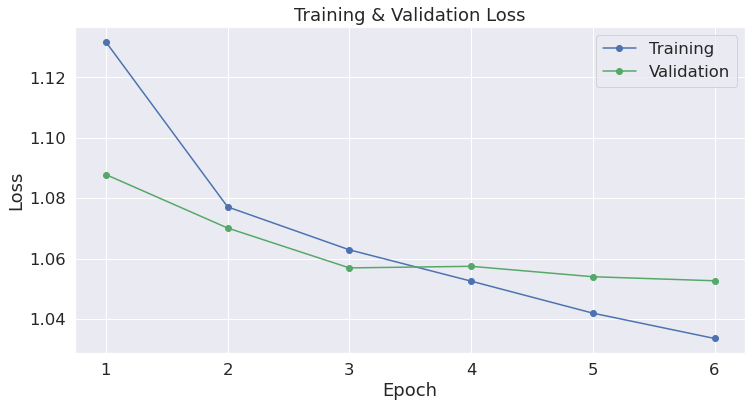

In [52]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_training['Training Loss'], 'b-o', label="Training")
plt.plot(df_training['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
epochs = df_test_validation['params.epochs'][0]
plt.xticks([x+1 for x in range(epochs)])

plt.savefig(f"./plots/loss-{df_test_validation['category'][0]}.png")


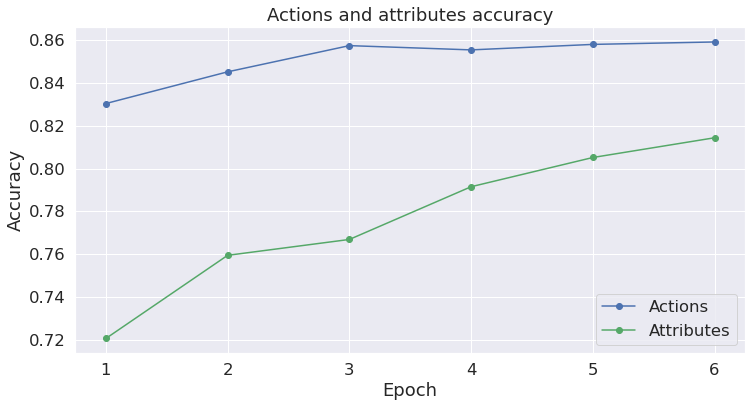

In [53]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

act_acc = [x['action_accuracy'] for x in df_training.metrics]
att_acc = [x['attribute_accuracy'] for x in df_training.metrics]
x_ticks = [x for x in range(len(act_acc))]

# Plot the learning curve.
plt.plot(act_acc, 'b-o', label="Actions")
plt.plot(att_acc, 'g-o', label="Attributes")

# Label the plot.
plt.title("Actions and attributes accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(ticks = x_ticks, labels = [str(x+1) for x in x_ticks])

plt.savefig(f"./plots/accuracy-{df_test_validation['category'][0]}.png")

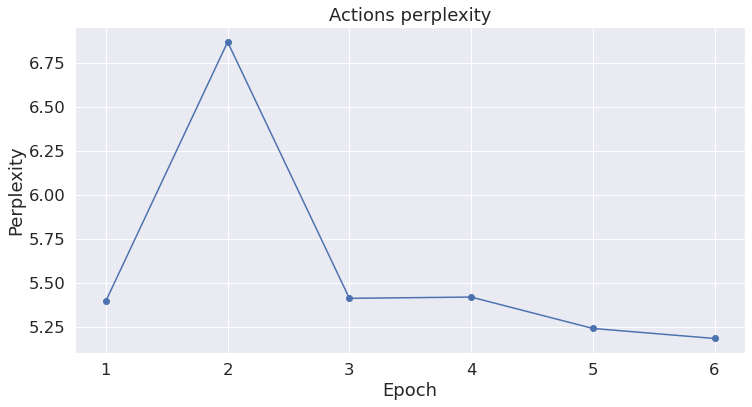

In [54]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

act_per = [x['action_perplexity'] for x in df_training.metrics]
x_ticks = [x for x in range(len(act_per))]

# Plot the learning curve.
plt.plot(act_per, 'b-o')

# Label the plot.
plt.title("Actions perplexity")
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.xticks(ticks = x_ticks, labels = [str(x+1) for x in x_ticks])

plt.savefig(f"./plots/perplexity-{df_test_validation['category'][0]}.png")